In [39]:
#import statements
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay




In [40]:
#Grab Data from csv
file='heart.csv'
raw_data=pd.read_csv(file)

In [41]:
print(raw_data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [42]:
#Feature Engineering not necessary here, as all values are already numeric

In [43]:
X_train, X_test, y_train, y_test = train_test_split(raw_data.drop('target', axis=1), raw_data['target'], random_state=43)

In [57]:
#Train the model
LogReg = LogisticRegression(solver='lbfgs', max_iter=1000)
LogReg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [45]:
LogReg.score(X_test, y_test)

0.8560311284046692

85 percent accuracy is fairy good for this model. 

Confusion Matrix:
 [[102  23]
 [ 14 118]]


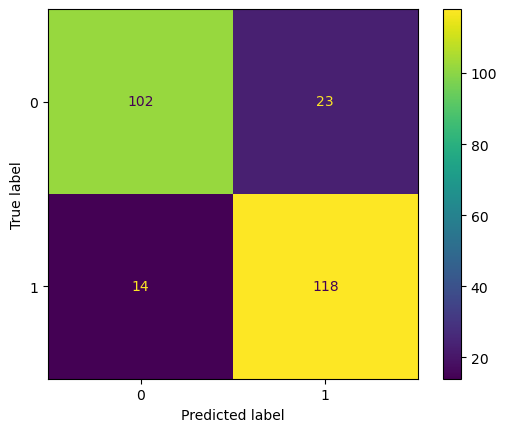

In [46]:

# Get predictions using the same test set
y_pred = LogReg.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


If I do it after cleaning the data, but not removing outliers:

In [47]:
trimmed_heart_data=raw_data.drop_duplicates(keep='first').reset_index()

In [64]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(trimmed_heart_data.drop('target', axis=1), trimmed_heart_data['target'], random_state=43)

In [65]:
noDupesReg = LogisticRegression(solver='lbfgs', max_iter=2000)
noDupesReg.fit(X_train1, y_train1)

LogisticRegression(max_iter=2000)

In [66]:
noDupesReg.score(X_test1, y_test1)

0.8157894736842105


## If I do it after cleaning the data AND removing outliers


In [51]:
outlier_indices = set()
for col in trimmed_heart_data:
    mean=trimmed_heart_data[col].mean()
    std=trimmed_heart_data[col].std()
    lower_bound= mean-(3 * std)
    upper_bound= mean+ (3*std)

    outliers = trimmed_heart_data[(trimmed_heart_data[col] <lower_bound) | (trimmed_heart_data[col] >upper_bound)]
    outlier_indices.update(outliers.index)
    print(f"{col} has {len(outliers)} outliers")
    
print(f'Number of rows containing outliers {len(outlier_indices)}')
print(outlier_indices)

index has 2 outliers
age has 0 outliers
sex has 0 outliers
cp has 0 outliers
trestbps has 2 outliers
chol has 4 outliers
fbs has 0 outliers
restecg has 0 outliers
thalach has 1 outliers
exang has 0 outliers
oldpeak has 2 outliers
slope has 0 outliers
ca has 4 outliers
thal has 2 outliers
target has 0 outliers
Number of rows containing outliers 17
{128, 227, 260, 104, 300, 301, 142, 108, 144, 49, 188, 51, 269, 14, 212, 124, 63}


In [52]:
clean_data=trimmed_heart_data.drop(index=outlier_indices)

In [61]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(clean_data.drop('target', axis=1), clean_data['target'], random_state=43)

In [62]:
noDupesOrOutliers=LogisticRegression(solver='lbfgs', max_iter=2000)
noDupesOrOutliers.fit(X_train2, y_train2)

LogisticRegression(max_iter=2000)

In [63]:
noDupesOrOutliers.score(X_test2, y_test2)

0.7916666666666666